In [47]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import cufflinks as cf
import chart_studio
from plotly.offline import iplot
import plotly.tools as tls

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (8).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df=dfs['LS_2.0']
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('\n','_')
df['LIABILITIES']=df['LIABILITIES'].astype(str).apply(lambda x: x.replace('\n','-'))
df['ASSETS']=df['ASSETS'].astype(str).apply(lambda x: x.replace('\n','-'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].astype(str).apply(lambda x: x.replace('Not Available','0'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x: float(x))
df['EDUCATION']=df['EDUCATION'].astype(str).apply(lambda x: x.replace('\n',''))

### Null and Duplicate Checks

In [48]:
df[df.duplicated()]## Check duplicates
df.isnull().values.any() ########Check NUlls
df.isnull().isnull().sum() ########Check NUlls by each column

STATE                                       0
CONSTITUENCY                                0
NAME                                        0
WINNER                                      0
PARTY                                       0
SYMBOL                                      0
GENDER                                      0
CRIMINAL_CASES                              0
AGE                                         0
CATEGORY                                    0
EDUCATION                                   0
ASSETS                                      0
LIABILITIES                                 0
GENERAL_VOTES                               0
POSTAL_VOTES                                0
TOTAL_VOTES                                 0
OVER_TOTAL_ELECTORS__IN_CONSTITUENCY        0
OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY    0
TOTAL_ELECTORS                              0
dtype: int64

### # Constituencies by State

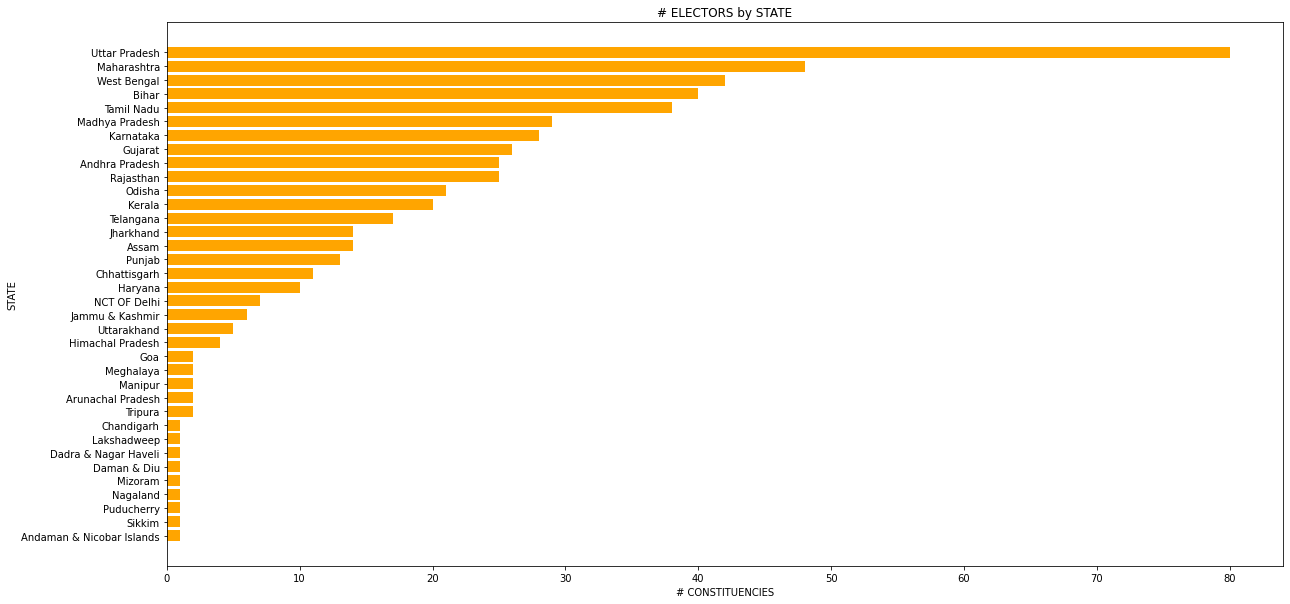

In [49]:
const=pd.DataFrame(df['CONSTITUENCY'].groupby(df['STATE']).nunique()).sort_values(by='CONSTITUENCY',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['CONSTITUENCY'].to_list(),height=0.8,color='orange')
plt.title('# ELECTORS by STATE')
plt.ylabel('STATE')
plt.xlabel('# CONSTITUENCIES')
plt.show()

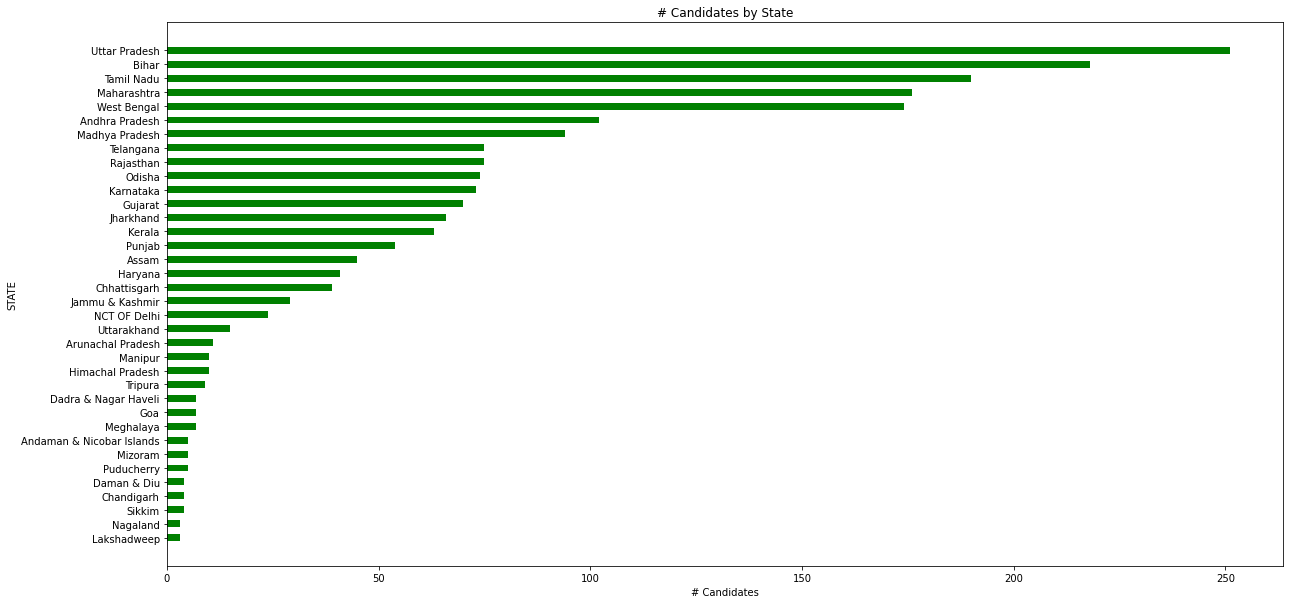

In [5]:
const=pd.DataFrame(df['NAME'].groupby(df['STATE']).nunique()).sort_values(by='NAME',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['NAME'].to_list(),height=0.5,color='green')
plt.title('# Candidates by State')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
plt.show()

Enter the State Name: ROBERT


<AxesSubplot:title={'center':'Data '}, ylabel='EDUCATION'>

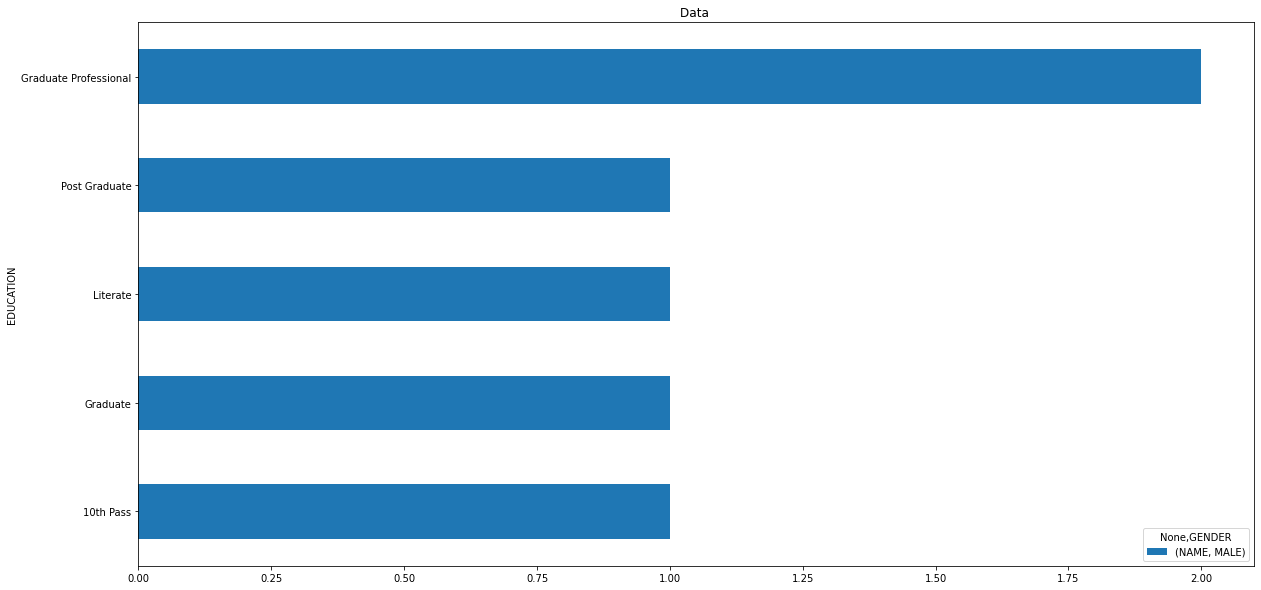

In [36]:
state = input('Enter the State Name:')
pd.DataFrame(df[df['CONSTITUENCY'].str.contains(state)]['NAME'].groupby([df['EDUCATION'],df['GENDER']]).nunique()).sort_values(by='NAME',ascending=True).unstack().plot(kind='barh',stacked=True,title="Data ",figsize=(20,10))

In [12]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414- ~ 30 Lacs+","Rs 2,31,450- ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888- ~ 1 Crore+","Rs 8,47,000- ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000- ~ 3 Crore+","Rs 1,53,00,000- ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036- ~ 7 Crore+","Rs 86,06,522- ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [33]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414- ~ 30 Lacs+","Rs 2,31,450- ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888- ~ 1 Crore+","Rs 8,47,000- ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000- ~ 3 Crore+","Rs 1,53,00,000- ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036- ~ 7 Crore+","Rs 86,06,522- ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


### 1. How many candidates have criminial cases and have won elections in 2019? Which state has maximum?

In [250]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE']]

q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print("How many candidates have criminial cases and have won elections in 2019?: ",q1['NAME'].groupby([q1['is_criminal'],q1['WINNER']]).nunique().unstack().iloc[1,1])
print("Which state has maximum criminal winners: ",q1[(q1['WINNER']==1)&(q1['is_criminal']==1)]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False).head(1))

How many candidates have criminial cases and have won elections in 2019?:  233
Which state has maximum criminal winners:  STATE
Uttar Pradesh    42
Name: NAME, dtype: int64


### 2. Are there any female candidates with criminal cases ? which state shows this trend

STATE with maximum criminal female candidates:                 NAME
STATE              
Uttar Pradesh    16
STATE with least criminal female candidates:         NAME
STATE      
Assam     1


<AxesSubplot:ylabel='STATE'>

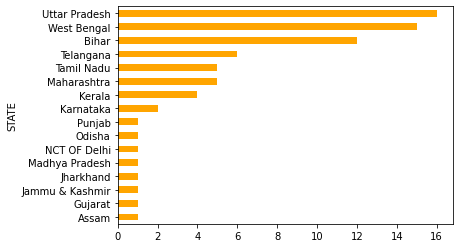

In [258]:
q1=df[['NAME','CRIMINAL_CASES','WINNER','STATE','GENDER']]
q1.loc[q1['CRIMINAL_CASES'] >0, 'is_criminal'] = 1
q1.loc[q1['CRIMINAL_CASES'] ==0, 'is_criminal'] = 0

print('STATE with maximum criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=False)).head(1))
print('STATE with least criminal female candidates: ',pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True)).head(1))


pd.DataFrame(q1[(q1['is_criminal']==1)&(q1['GENDER']=='FEMALE')]['NAME'].groupby([q1['STATE']]).nunique().sort_values(ascending=True)).plot(kind='barh',legend=None,color='orange')

### 3. Which state has most old candidates?

In [283]:
q1=df[['NAME','AGE','STATE','GENDER']]

pd.DataFrame(q1['AGE'].groupby([q1['STATE']]).mean().sort_values(ascending=False)).head(1)

pd.DataFrame(q1['AGE'].groupby([q1['STATE']]).mean().sort_values(ascending=False))

,AGE
STATE,
Chandigarh,64.500000
Goa,59.666667
Nagaland,58.333333
Uttarakhand,57.285714
Jammu & Kashmir,56.428571
Punjab,56.264151
Kerala,55.682540
Manipur,55.200000
Tripura,55.125000


### 4. How many parties are there at National Level? Represent Them on a pie . Slices to be based on # Votes

### 5. Which state has most qualified Candidates?

### 6. Which party has most Gen category candidates?

### 7. Which state has the richest candidates? Which party do they belong to?

### 8. Which consituency was voted with highest NOTA?

### 9. In each state what is the turn-up percentage of voters?

### 10. Which state has the highest #female candidates?

### Are there any all male or all female candidates in a constituency?

### 11. What is the correlation b/w #candidates and #consituency?

### 12. Is there a scenario where in the states with low population density are using postal votes? Test the hypotheses

### 13. What is the highest difference of votes between loosing and winning candidate?

### 14. What is the lowest difference of votes between loosing and winning candidate?

### 15. Which candidate has the lowest net assets? Which constituecy they belong to?

### 16. What is most wierdest party symbol? Which constituency and in which state is it?

### 17. Which party has only female or only male candidates?

### 18. Which two or more parties have same symbol and what is the symbol?

### 19. Which state has most 18+ voters registered?

### 20. How many candidates have Gandhi as surname? and How many of then have actually won in their constituency?

### 21. Are people voting or even considering the education of the candidate?

### 22. Check if the criminal cases have any relation with Educational qualification of the candidate?

In [20]:
state = input('Enter the State Name:')
pd.DataFrame(df[df['CONSTITUENCY'].str.contains(state)])

Enter the State Name: DELHI


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS
682,NCT OF Delhi,EAST DELHI,GAUTAM GAMBHIR,1,BJP,Lotus,MALE,1.0,37.0,GENERAL,12th Pass,"Rs 1,47,15,87,789- ~ 147 Crore+","Rs 34,20,35,860- ~ 34 Crore+",695109,1047,696156,34.136974,55.329738,2039302
683,NCT OF Delhi,EAST DELHI,ARVINDER SINGH LOVELY,0,INC,Hand,MALE,0.0,50.0,GENERAL,Graduate,"Rs 5,04,52,066- ~ 5 Crore+",Rs 0- ~,304718,216,304934,14.952861,24.235830,2039302
684,NCT OF Delhi,EAST DELHI,ATISHI,0,AAP,Broom,FEMALE,1.0,37.0,GENERAL,Post Graduate,"Rs 1,20,12,824- ~ 1 Crore+",Rs 0- ~,219156,172,219328,10.755052,17.431956,2039302
685,NCT OF Delhi,EAST DELHI,SANJAY KUMAR,0,BSP,Elephant,MALE,0.0,48.0,SC,12th Pass,"Rs 46,93,400- ~ 46 Lacs+","Rs 8,45,000- ~ 8 Lacs+",19033,57,19090,0.936105,1.517253,2039302
1577,NCT OF Delhi,NEW DELHI,MEENAKASHI LEKHI,1,BJP,Lotus,FEMALE,0.0,51.0,GENERAL,Graduate Professional,"Rs 36,14,41,689- ~ 36 Crore+","Rs 79,38,378- ~ 79 Lacs+",503157,1049,504206,31.172510,54.771244,1617470
1578,NCT OF Delhi,NEW DELHI,AJAY MAKAN,0,INC,Hand,MALE,0.0,55.0,GENERAL,Post Graduate,"Rs 24,57,32,926- ~ 24 Crore+",Rs 0- ~,247429,273,247702,15.314163,26.907547,1617470
1579,NCT OF Delhi,NEW DELHI,BRIJESH GOYAL,0,AAP,Broom,MALE,0.0,43.0,GENERAL,Graduate,"Rs 95,94,156- ~ 95 Lacs+","Rs 32,85,554- ~ 32 Lacs+",150203,139,150342,9.294886,16.331457,1617470
1588,NCT OF Delhi,NORTH EAST DELHI,MANOJ TIWARI,1,BJP,Lotus,MALE,3.0,47.0,GENERAL,Post Graduate,"Rs 24,28,17,031- ~ 24 Crore+","Rs 1,36,18,755- ~ 1 Crore+",785262,2537,787799,34.394314,53.856766,2290492
1589,NCT OF Delhi,NORTH EAST DELHI,SHEILA DIKSHIT,0,INC,Hand,FEMALE,0.0,81.0,GENERAL,Post Graduate,"Rs 4,92,85,773- ~ 4 Crore+",Rs 0- ~,421293,404,421697,18.410761,28.828720,2290492
1590,NCT OF Delhi,NORTH EAST DELHI,DILIP PANDEY,0,AAP,Broom,MALE,1.0,38.0,GENERAL,Post Graduate,"Rs 54,33,393- ~ 54 Lacs+",Rs 0- ~,190586,270,190856,8.332533,13.047601,2290492
